# Direction


 1. Go to https://www.obagi.com/collections/shop-all
 2. Click "Show More" on the website to see all the products.


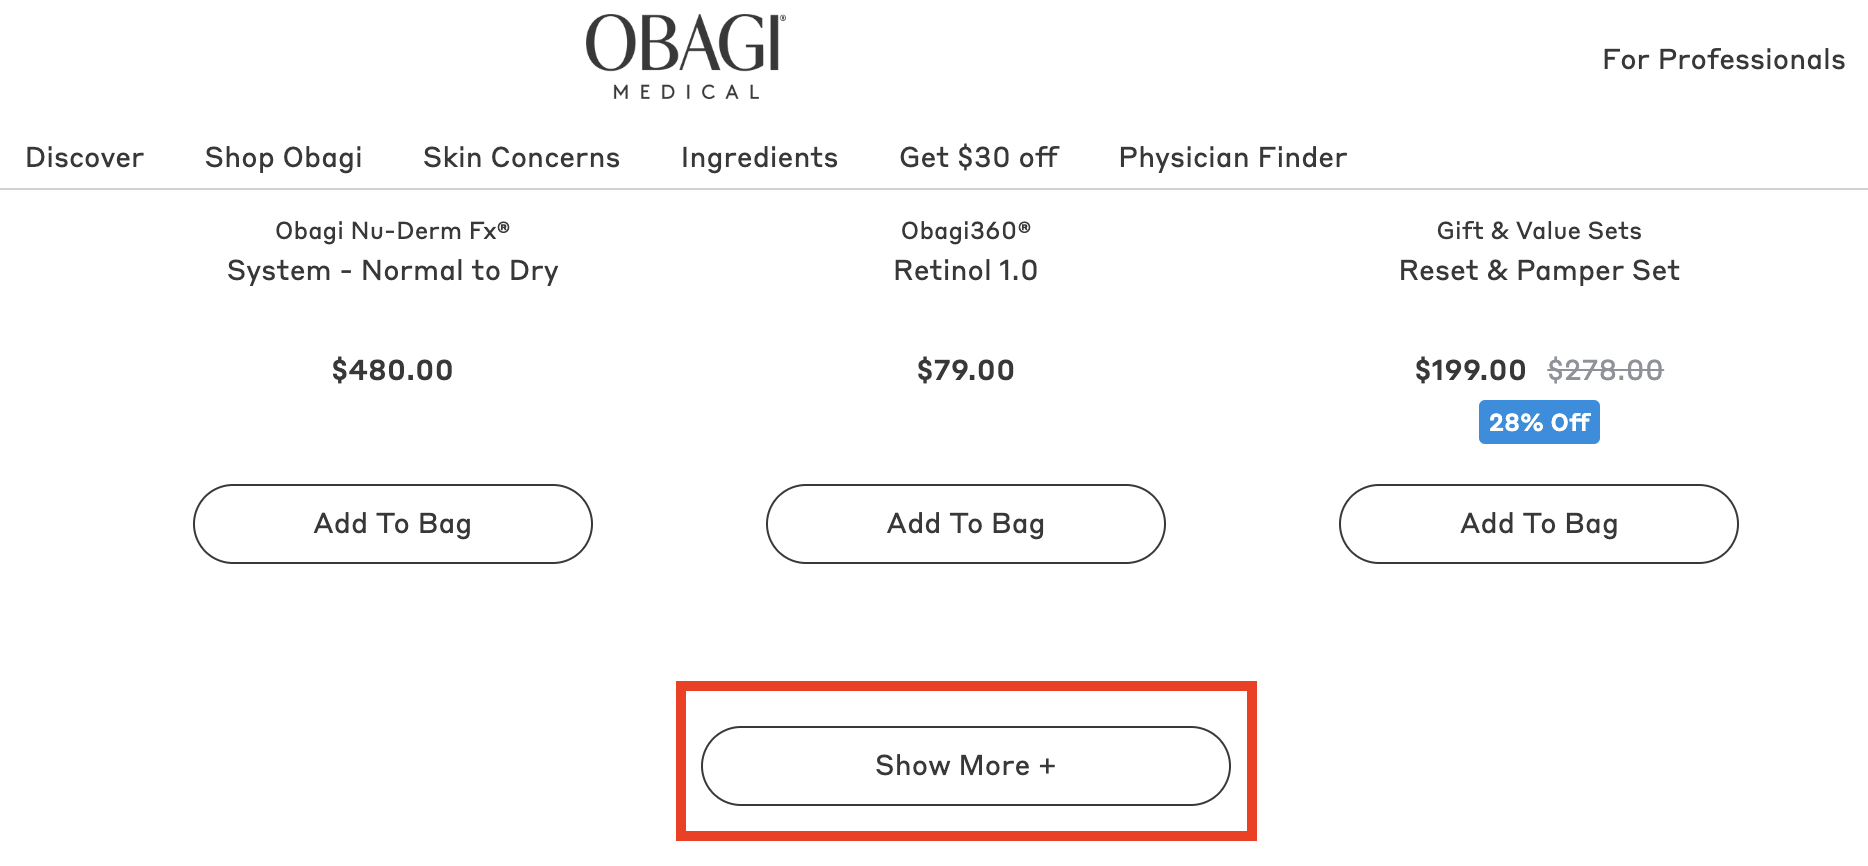

3. Scroll all the way down and ensure that there is no more "Show More" option

 4. Press fn + F12 to inspect the body part of the HTML code.
 5. Copy all the HTML code and paste it into the text below html = '''...'''.

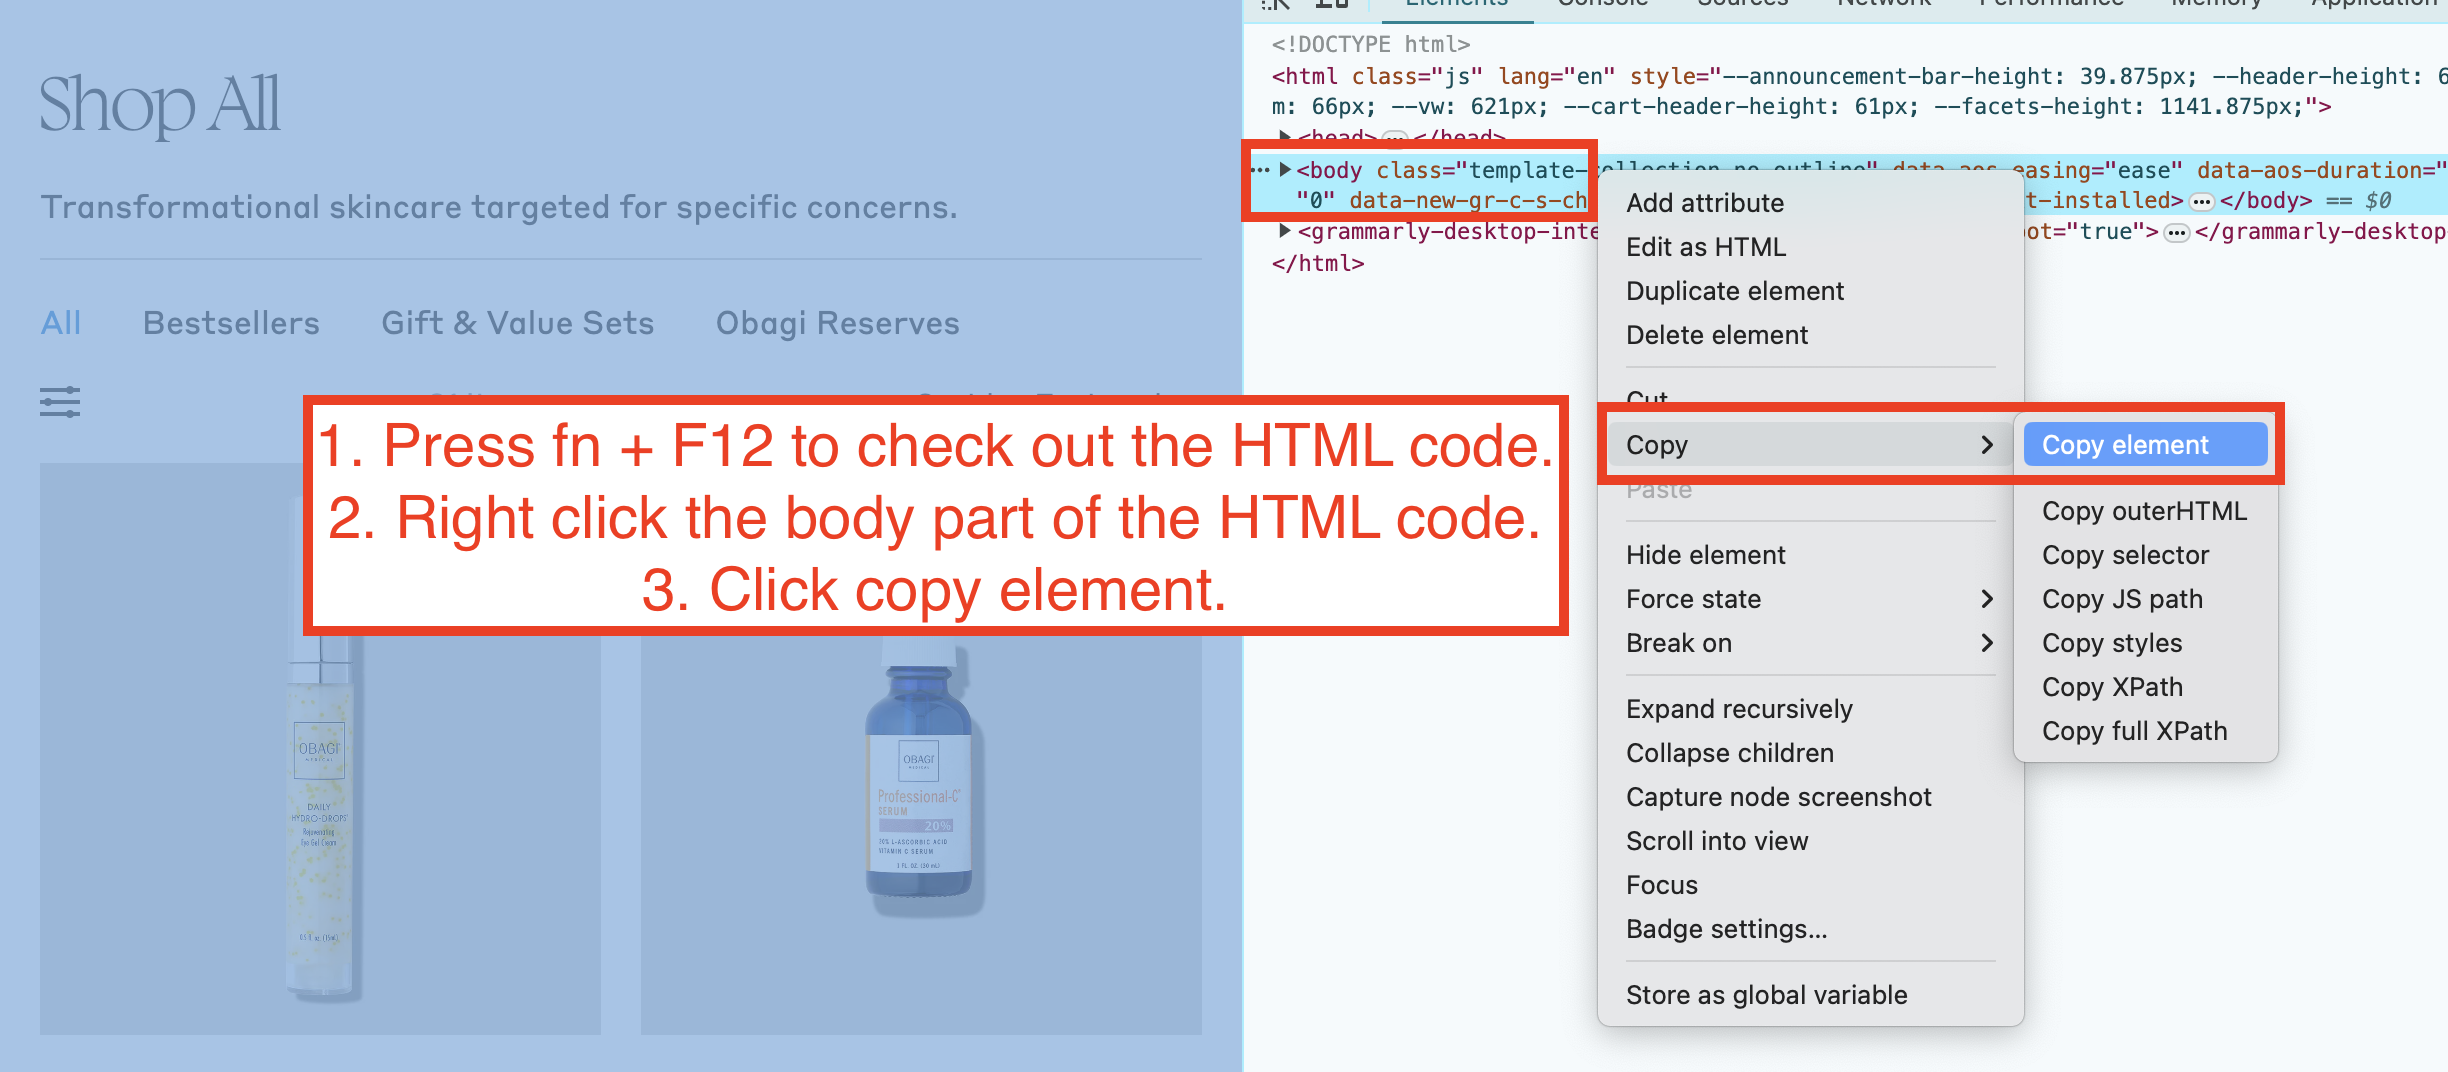



In [ ]:
# html = '''...'''

## Get Product URLs

In [ ]:
from bs4 import BeautifulSoup

# Assuming `html` contains the HTML content
soup = BeautifulSoup(html, 'html.parser')
urls = []
for li_tag in soup.find_all('li', class_="collection__content-grid-list-item grid__item"):
    a_tag = li_tag.find('a', class_="product-card__img-wrapper")
    if a_tag:
        url = a_tag.get('href')
        full_url = 'https://www.obagi.com' + url
        urls.append(full_url)

all_urls = urls
print(len(urls))
print(all_urls)


11
['https://www.obagi.com/products/rejuvenating-eye-gel-cream', 'https://www.obagi.com/products/professional-c-serum-20', 'https://www.obagi.com/products/obagi-nu-cil-eyelash-enhancing-serum', 'https://www.obagi.com/products/elastiderm-facial-moisturizing-serum', 'https://www.obagi.com/products/professional-c-serum-peptide-complex-hydration', 'https://www.obagi.com/products/obagi-nu-cil-eyebrow-boosting-serum', 'https://www.obagi.com/products/professional-c-serum-15', 'https://www.obagi.com/products/elastiderm-eye-cream-fine-lines-wrinkles', 'https://www.obagi.com/products/obagi-nu-derm-fx-system-normal-to-dry', 'https://www.obagi.com/products/obagi360-retinol-1-0-serum-fine-lines-wrinkles', 'https://www.obagi.com/products/reset-pamper-set']


## Get Product Informaiton

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

def crawl_product_info(url):
    dom = requests.get(url).text
    soup = BeautifulSoup(dom, 'html.parser')

    # Get Product Title
    title_tag = soup.find('head').find('title')
    product_title = title_tag.text.strip()

    # Get Product Price
    price_span = soup.find('span', class_="pdp-details__subs-price-wrapper body3--bold")
    if price_span:
        price = price_span.text.strip()
    else:
        price = "No Price"

    # Get Product Ingredients
    ingredients = ''
    h6_tag = soup.find('h6', string='Full Ingredients')
    if h6_tag:
        p_tag = h6_tag.find_next('p')
        if p_tag:
            ingredients = p_tag.text.strip()
        else:
            ingredients = "No Ingredients"
    else:
        ingredients = "No Ingredients"

    # Get Product Key Ingredients
    div_tag = soup.find('div', {'data-show-more-body': True})
    if div_tag:
        key_ingredients = ""
        h6_tags = div_tag.find_all('h6')
        for h6_tag in h6_tags:
            key_ingredients += h6_tag.text.strip() + ", "
        li_tags = div_tag.find_all('li')
        for li_tag in li_tags:
            key_ingredients += li_tag.text.strip() + ", "
        if key_ingredients:
            key_ingredients = key_ingredients[:-2]
        else:
            key_ingredients = "No Product Key Ingredients."
    else:
         key_ingredients = "No Product Key Ingredients."

    # Get Best for
    best_for_str = ''
    treat_div = soup.find('div', class_="pdp-details__skin_concerns pdp-details__skin-block")
    if treat_div:
        a_tags = treat_div.find_all('a')
        if a_tags:
            best_for_str = ', '.join([a_tag.text.strip() for a_tag in a_tags])
        else:
            best_for_str = "No Best for"
    else:
        best_for_str = "No Best for"

    # Get Skin Types
    skin_types_str = ''
    type_div = soup.find('div', class_="pdp-details__skin_types pdp-details__skin-block")
    if type_div:
        a_tags = type_div.find_all('a')
        if a_tags:
            skin_types_str = ', '.join([a_tag.text.strip() for a_tag in a_tags])
        else:
            skin_types_str = "No Skin Type"
    else:
        skin_types_str = "No Skin Type"

    # Get Before and After Image URLs
    image_urls_str = ''
    image_divs = soup.find_all('div', class_='comparison__slide-image')
    if image_divs:
        image_urls_str = ', '.join([div.find('img')['src'] for div in image_divs])
    else:
        image_urls_str = "No Images"

    return {
        'Product Title': product_title,
        'Product Price': price,
        'Product Ingredients': ingredients,
        'Product Key Ingredients': key_ingredients,
        'Best for': best_for_str,
        'Skin Types': skin_types_str,
        'Before and After Image URLs': image_urls_str
    }

def main():
    data = []
    for url in all_urls:
        product_info = crawl_product_info(url)
        data.append(product_info)

    df = pd.DataFrame(data)
    return df

if __name__ == '__main__':
    df = main()
    print(df)


                                        Product Title Product Price  \
0       Skin Barrier Recovery Cream | Obagi Rebalance       $110.00   
1           Hydrating Face Cream | Obagi Hydrate Luxe        $78.00   
2   Hydrating Face Serum | Obagi Daily Hydro-Drops...       $105.00   
3   Face Moisturizer | Obagi Hydrate Facial Moistu...        $58.00   
4      Acne Therapeutic Hydrating Moisturizer | Obagi        $48.00   
..                                                ...           ...   
68      Vitamin C Serum 15% + Retinol 1.0 Set | Obagi      No Price   
69             Back to Basics Set (Serum 15%) | Obagi      No Price   
70             Back to Basics Set (Serum 20%) | Obagi      No Price   
71  Hydrating Eye Gel | Obagi Rejuvenating Eye Gel...      No Price   
72  Skin Brightening System: Normal to Dry Skin | ...      No Price   

                                  Product Ingredients  \
0   Aqua/water/eau, caprylic/capric triglyceride, ...   
1   Aqua/water/eau, glycerin, cap

## Data Cleaning

In [ ]:
# Data Cleaning
df2 = df.copy()

# Data Cleaning
df2['Product Title'] = df2['Product Title'].apply(lambda x: x.split('|')[0].strip())
df2['Product Price'] = df2['Product Price'].str.replace('$', '')
df2['Before Image'] = df2['Before and After Image URLs'].apply(lambda x: x.split(',')[0].strip() if ',' in x else ('No Images' if x == 'No Images' else x.strip()))
df2['After Image'] = df2['Before and After Image URLs'].apply(lambda x: x.split(',')[1].strip() if (',' in x) and (len(x.split(',')) > 1) else ('No Images' if x == 'No Images' else ''))
df2['Product URLs'] = all_urls
df2['Product Key Ingredients'] = df2['Product Key Ingredients'].str.replace(', Full Ingredients', '')
df2['Product Key Ingredients'] = df2['Product Key Ingredients'].str.replace('.', '')
df2.drop(columns=['Before and After Image URLs'], inplace=True)

print(df2)


                                  Product Title Product Price  \
0                   Skin Barrier Recovery Cream        110.00   
1                          Hydrating Face Cream         78.00   
2                          Hydrating Face Serum        105.00   
3                              Face Moisturizer         58.00   
4        Acne Therapeutic Hydrating Moisturizer         48.00   
..                                          ...           ...   
68        Vitamin C Serum 15% + Retinol 1.0 Set      No Price   
69               Back to Basics Set (Serum 15%)      No Price   
70               Back to Basics Set (Serum 20%)      No Price   
71                            Hydrating Eye Gel      No Price   
72  Skin Brightening System: Normal to Dry Skin      No Price   

                                  Product Ingredients  \
0   Aqua/water/eau, caprylic/capric triglyceride, ...   
1   Aqua/water/eau, glycerin, caprylic/capric trig...   
2   Aqua/water/eau, propanediol, glycerin, isono

## Download Excel file

In [ ]:
# Download Excel file
from google.colab import files
df2.to_excel('Obagi_products.xlsx', index=False)
files.download('Obagi_products.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>